In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats

from eda_utilities import print_eda_stats
from data_pipeline import dockless_data_pipeline
from data_pipeline import weather_data_pipeline

In [3]:
# Read the dockless data from S3 bucket
# Load the data and and call the clean method automatically to call the work flow
dockless_data = pd.read_csv("https://s3.amazonaws.com/sameera-bucket-1/dockless_mobility/raw_data/Austin_Dockless_Vehicle_Trips.csv")
dockless_vehicles_columns = dockless_data.columns
print_eda_stats(dockless_data, dockless_vehicles_columns, "Austin Dockless Mobility Data")
# Call the dockless_data_pipeline()
dockless_data_pipeline(dockless_data)
dockless_vehicles_columns = dockless_data.columns
print_eda_stats(dockless_data, dockless_vehicles_columns, "Austin Dockless Mobility Data")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


+--------------------------+---------+-------------+---------------+--------------+-------------------+
|       Column Name        |  dtype  | Total_Count | Unique_Values | df_totalrows | Null Value counts |
+--------------------------+---------+-------------+---------------+--------------+-------------------+
|            ID            |  object |   2746505   |    2746505    |   2746505    |         0         |
|        Device ID         |  object |   2746505   |     26999     |   2746505    |         0         |
|       Vehicle Type       |  object |   2746504   |       3       |   2746505    |         1         |
|      Trip Duration       | float64 |   2746504   |     10521     |   2746505    |         1         |
|      Trip Distance       | float64 |   2746504   |     16125     |   2746505    |         1         |
|        Start Time        |  object |   2746504   |     25694     |   2746505    |         1         |
|         End Time         |  object |   2746504   |     25768  

In [4]:
#Read the weather data from S3 bucket
weather_data = pd.read_csv("https://s3.amazonaws.com/sameera-bucket-1/dockless_mobility/raw_data/Austin_Bergstom_Airport_Weather.csv")
weather_columns = weather_data.columns
print_eda_stats(weather_data, weather_columns, "Austin Weather Data")
weather_data_pipeline(weather_data)
weather_columns = weather_data.columns
print_eda_stats(weather_data, weather_columns, "Austin Weather Data")

+-----------------+---------+-------------+---------------+--------------+-------------------+
|   Column Name   |  dtype  | Total_Count | Unique_Values | df_totalrows | Null Value counts |
+-----------------+---------+-------------+---------------+--------------+-------------------+
|     STATION     |  object |     436     |       1       |     436      |         0         |
|       NAME      |  object |     436     |       1       |     436      |         0         |
|     LATITUDE    | float64 |     436     |       1       |     436      |         0         |
|    LONGITUDE    | float64 |     436     |       1       |     436      |         0         |
|    ELEVATION    | float64 |     436     |       1       |     436      |         0         |
|       DATE      |  object |     436     |      436      |     436      |         0         |
|       AWND      | float64 |     435     |       73      |     436      |         1         |
| AWND_ATTRIBUTES |  object |     435     |       

In [5]:
# Drop all records where  trip distance is less .1 miles and greater than 500 miles (1609.34 mts - 804673 mts)
dockless_data = dockless_data[(dockless_data['Trip Distance'] > 1609.34) & (dockless_data['Trip Distance'] < 804673)]

In [6]:
dockless_data = dockless_data[(dockless_data['Trip Duration'] > 60) & (dockless_data['Trip Duration'] < 86400)]

In [6]:
dockless_data.shape

(688246, 18)

In [7]:
weather_data.shape

(436, 7)

In [9]:
dockless_data.groupby("Origin Cell ID", sort=True).agg('count')

,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day of Week,Council District (Start),Council District (End),Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude,START_DATE,END_DATE
Origin Cell ID,,,,,,,,,,,,,,,,,
5407.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5871,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6029,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6353,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7017,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7583,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
7742,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7893,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
7899,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [20]:
# grouped = dockless_data.groupby("Origin Cell ID").sum().reset_index()
# grouped.sort_values('Origin Cell ID', ascending=False)

grouped = dockless_data.groupby(['Origin Cell ID']).agg('count')

In [21]:
grouped

,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day of Week,Council District (Start),Council District (End),Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude,START_DATE,END_DATE
Origin Cell ID,,,,,,,,,,,,,,,,,
5407.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5871,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6029,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6353,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7017,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7583,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
7742,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7893,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
7899,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [24]:
grouped.sort_values(['Trip Duration' ''], ascending=False)

,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day of Week,Council District (Start),Council District (End),Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude,START_DATE,END_DATE
Origin Cell ID,,,,,,,,,,,,,,,,,
014706,14201,14201,14201,14201,14201,14201,14201,14201,14201,14201,14201,14201,14201,14201,14201,14201,14201
014705,13650,13650,13650,13650,13650,13650,13650,13650,13650,13650,13650,13650,13650,13650,13650,13650,13650
014864,13176,13176,13176,13176,13176,13176,13176,13176,13176,13176,13176,13176,13176,13176,13176,13176,13176
014707,13175,13175,13175,13175,13175,13175,13175,13175,13175,13175,13175,13175,13175,13175,13175,13175,13175
015019,11791,11791,11791,11791,11791,11791,11791,11791,11791,11791,11791,11791,11791,11791,11791,11791,11791
014865,10888,10888,10888,10888,10888,10888,10888,10888,10888,10888,10888,10888,10888,10888,10888,10888,10888
014391,9038,9038,9038,9038,9038,9038,9038,9038,9038,9038,9038,9038,9038,9038,9038,9038,9038
014385,9017,9017,9017,9017,9017,9017,9017,9017,9017,9017,9017,9017,9017,9017,9017,9017,9017
014863,8848,8848,8848,8848,8848,8848,8848,8848,8848,8848,8848,8848,8848,8848,8848,8848,8848


In [23]:
duration.sort_values(ascending=False)

Origin Cell ID
014706    14201
014705    13650
014864    13176
014707    13175
015019    11791
014865    10888
014391     9038
014385     9017
014863     8848
015018     8117
014078     7531
014548     7517
014549     7500
015021     7446
015022     7423
014393     6836
014546     6257
015179     5996
014226     5846
014550     5361
014866     5322
014235     5264
014077     4949
014234     4715
014225     4701
015186     4680
015017     4599
014871     4534
014384     4472
014867     4302
          ...  
010257        1
010220        1
010143        1
010123        1
010381        1
010111        1
010107        1
010104        1
010102        1
010098        1
010092        1
010292        1
010414        1
010612        1
010539        1
010607        1
010598        1
010577        1
010571        1
010561        1
010558        1
010434        1
010419        1
010429        1
010426        1
010425        1
010424        1
010423        1
010420        1
013338        1
Name: Tri

In [25]:
most_used_cell_id = dockless_data[dockless_data['Origin Cell ID'] == '014706']

In [26]:
most_used_cell_id.shape

(14201, 18)

In [7]:
grouped_origin_cell_id = dockless_data.groupby(['Origin Cell ID']).agg('count')
grouped_origin_cell_id = grouped_origin_cell_id.sort_values(['Trip Duration'], ascending=False)
top_cell_ids = grouped_origin_cell_id['Trip Duration']
top_cell_ids = top_cell_ids.to_frame().reset_index()
top_50 = top_cell_ids.head(50)
top_50
#type(top_50)

,Origin Cell ID,Trip Duration
0,014706,14201
1,014705,13650
2,014864,13176
3,014707,13175
4,015019,11791
5,014865,10888
6,014391,9038
7,014385,9017
8,014863,8848
9,015018,8117


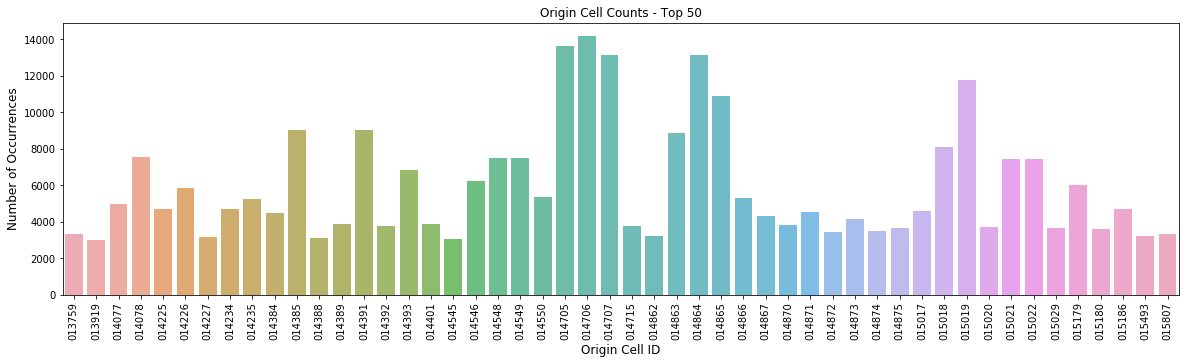

In [57]:
# Plot top 50 origin cell ID

# grouped_origin_cell_id = dockless_data.groupby(['Origin Cell ID']).agg('count')
# grouped_origin_cell_id = grouped_origin_cell_id.sort_values(['Trip Duration'], ascending=False)
# top_cell_ids = grouped_origin_cell_id['Trip Duration']
# top_cell_ids = top_cell_ids.to_frame().reset_index()
# top_50 = top_cell_ids.head(50)



# plt.figure(figsize=(20,5))
# sns.barplot(top_50['Origin Cell ID'], top_50['Trip Duration'], alpha=0.8)
# plt.title('Origin Cell Counts - Top 50')
# plt.ylabel('Number of Occurrences', fontsize=12)
# plt.xlabel('Origin Cell ID', fontsize=12,rotation='horizontal')
# plt.xticks(rotation=90)
# plt.savefig('../output/EDA/Origin_Cell_Counts_Top_50_new.png')
# plt.show()

In [10]:
dockless_data['count'] = 1

In [11]:
top_10_origin_cells = top_50.head(10)['Origin Cell ID']
top_origin_cell = top_10_origin_cells[0]




trips_top_one = dockless_data[dockless_data['Origin Cell ID'] == top_origin_cell].reset_index()

trips_top_one

,index,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude,START_DATE,END_DATE,count
0,383,1130.0,1814.0,2018-09-22 12:00:00,2018-09-22 12:30:00,9,12,6,9,9,014706,014706,2018,30.265,-97.743,30.264,-97.744,2018-09-22,2018-09-22,1
1,486,471.0,1674.0,2018-08-06 18:30:00,2018-08-06 18:45:00,8,18,1,9,9,014706,014385,2018,30.265,-97.744,30.251,-97.749,2018-08-06,2018-08-06,1
2,557,810.0,2900.0,2018-11-07 07:30:00,2018-11-07 07:45:00,11,7,3,9,9,014706,014705,2018,30.266,-97.743,30.263,-97.744,2018-11-07,2018-11-07,1
3,1183,895.0,1957.0,2018-10-23 19:15:00,2018-10-23 19:30:00,10,19,2,9,9,014706,015174,2018,30.265,-97.744,30.253,-97.737,2018-10-23,2018-10-23,1
4,1345,1909.0,6091.0,2018-08-19 09:30:00,2018-08-19 10:00:00,8,9,0,9,9,014706,014549,2018,30.264,-97.744,30.265,-97.746,2018-08-19,2018-08-19,1
5,1382,2052.0,2796.0,2018-09-22 18:00:00,2018-09-22 18:45:00,9,18,6,9,9,014706,014706,2018,30.265,-97.743,30.265,-97.743,2018-09-22,2018-09-22,1
6,1572,790.0,2951.0,2018-10-07 10:30:00,2018-10-07 10:30:00,10,10,0,9,9,014706,014231,2018,30.264,-97.744,30.259,-97.752,2018-10-07,2018-10-07,1
7,1726,798.0,3090.0,2018-10-10 15:30:00,2018-10-10 15:45:00,10,15,3,9,3,014706,015960,2018,30.265,-97.744,30.251,-97.724,2018-10-10,2018-10-10,1
8,1985,1746.0,2498.0,2018-07-21 16:30:00,2018-07-21 17:00:00,7,16,6,9,9,014706,014392,2018,30.265,-97.743,30.267,-97.747,2018-07-21,2018-07-21,1
9,2110,672.0,6539.0,2018-07-22 00:45:00,2018-07-22 01:00:00,7,0,0,9,9,014706,014865,2018,30.265,-97.743,30.268,-97.742,2018-07-22,2018-07-22,1


TypeError: Empty 'DataFrame': no numeric data to plot

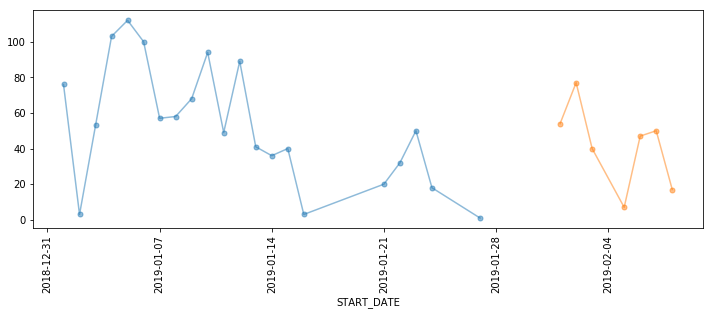

In [68]:
def plot_daily_rides_count(n):
    mth = trips[trips['Month'] == n]
    mth_cnt = mth.groupby('START_DATE').count()['count']
    mth_cnt.plot(marker='o', markersize=5, alpha=.5, rot=90)

fig = plt.figure(figsize=(12, 4))
for i in range(1,12):
    plot_daily_rides_count(i)
plt.ylabel('Number of Rides', fontsize=14)
plt.xlabel('Month', fontsize=14)
# count_on_each_day = trips.groupby('START_DATE').count()['count']
# mean_activity = count_on_each_day.mean()
# upper_std = mean_activity + 1.5 * np.std(count_on_each_day)
# lower_std = mean_activity - 1.5 * np.std(count_on_each_day)
# plt.axhline(upper_std, linestyle='--', c='black', alpha=.4)
# plt.axhline(lower_std, linestyle='--', c='black', alpha=.4)
# plt.axhline(mean_activity, c='black', alpha=.4)
plt.show()

In [65]:
count_on_each_day = trips.groupby('START_DATE').count()['count']
count_on_each_day

START_DATE
2018-04-06      1
2018-04-08      3
2018-04-09      3
2018-04-10      8
2018-04-11     10
2018-04-12     17
2018-04-13     13
2018-04-14     11
2018-04-15     14
2018-04-16     14
2018-04-17     40
2018-04-18     39
2018-04-19     35
2018-04-20     13
2018-04-22     24
2018-04-23     22
2018-04-24     34
2018-04-25     20
2018-04-26     30
2018-04-27     35
2018-05-23      6
2018-05-24      5
2018-05-25     18
2018-05-26      9
2018-05-27     11
2018-05-28     18
2018-05-29     19
2018-05-30     13
2018-05-31      7
2018-06-01     22
             ... 
2018-12-30     46
2018-12-31    152
2019-01-01     76
2019-01-02      3
2019-01-03     53
2019-01-04    103
2019-01-05    112
2019-01-06    100
2019-01-07     57
2019-01-08     58
2019-01-09     68
2019-01-10     94
2019-01-11     49
2019-01-12     89
2019-01-13     41
2019-01-14     36
2019-01-15     40
2019-01-16      3
2019-01-21     20
2019-01-22     32
2019-01-23     50
2019-01-24     18
2019-01-27      1
2019-02-01     54

In [71]:

def daily_rides_count(n):
    mth = trips[trips['Month'] == n]
    mth_cnt = mth.groupby('START_DATE').count()['count']
    print("Month and Count %s:%s" %(n,mth_cnt))

for i in range(1,12):
    daily_rides_count(i)

Month and Count 1:START_DATE
2019-01-01     76
2019-01-02      3
2019-01-03     53
2019-01-04    103
2019-01-05    112
2019-01-06    100
2019-01-07     57
2019-01-08     58
2019-01-09     68
2019-01-10     94
2019-01-11     49
2019-01-12     89
2019-01-13     41
2019-01-14     36
2019-01-15     40
2019-01-16      3
2019-01-21     20
2019-01-22     32
2019-01-23     50
2019-01-24     18
2019-01-27      1
Name: count, dtype: int64
Month and Count 2:START_DATE
2019-02-01    54
2019-02-02    77
2019-02-03    40
2019-02-05     7
2019-02-06    47
2019-02-07    50
2019-02-08    17
Name: count, dtype: int64
Month and Count 3:Series([], Name: count, dtype: int64)
Month and Count 4:START_DATE
2018-04-06     1
2018-04-08     3
2018-04-09     3
2018-04-10     8
2018-04-11    10
2018-04-12    17
2018-04-13    13
2018-04-14    11
2018-04-15    14
2018-04-16    14
2018-04-17    40
2018-04-18    39
2018-04-19    35
2018-04-20    13
2018-04-22    24
2018-04-23    22
2018-04-24    34
2018-04-25    20
20

In [76]:
#trips.groupby('START_DATE').count()['count'].plot(marker='o')
type(trips.groupby('START_DATE').count()['count'])

pandas.core.series.Series

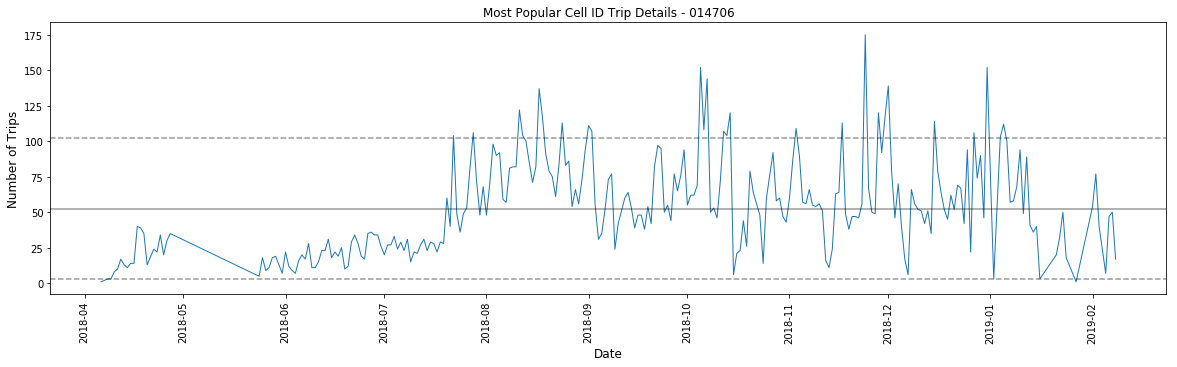

In [16]:
plt.figure(figsize=(20,5))
trip_counts = trips.groupby('START_DATE').count()['count']
sns.lineplot(x=trip_counts.index, y=trip_counts.values, sort=False, lw=1)
mean_activity = trip_counts.mean()
upper_std = mean_activity + 1.5 * np.std(trip_counts)
lower_std = mean_activity - 1.5 * np.std(trip_counts)
plt.axhline(upper_std, linestyle='--', c='black', alpha=.4)
plt.axhline(lower_std, linestyle='--', c='black', alpha=.4)
plt.axhline(mean_activity, c='black', alpha=.4)
plt.title('Most Popular Cell ID Trip Details - 014706')
plt.ylabel('Number of Trips', fontsize=12)
plt.xlabel('Date', fontsize=12,rotation='horizontal')
plt.xticks(rotation=90)
plt.savefig('../output/EDA/Top_cell_Trip_details_yearly.png')
plt.show()

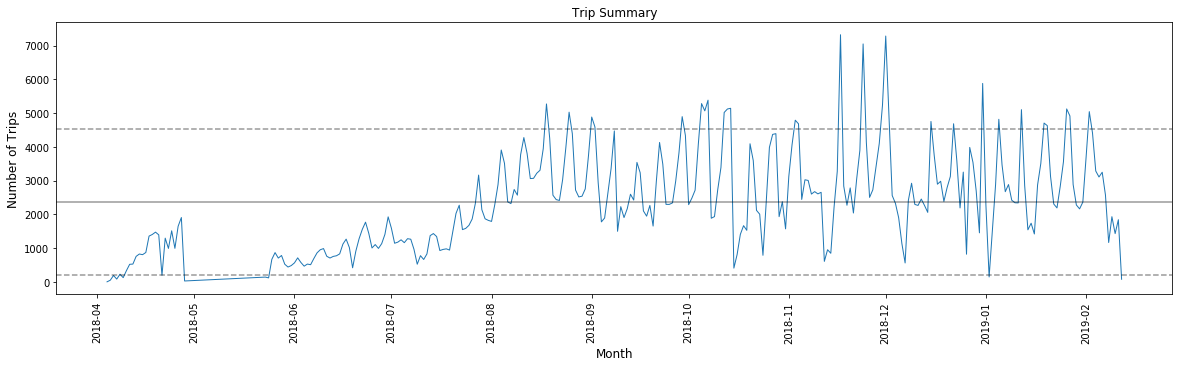

In [18]:
plt.figure(figsize=(20,5))
trip_counts = dockless_data.groupby('START_DATE').count()['count']
sns.lineplot(x=trip_counts.index, y=trip_counts.values, sort=False, lw=1)
mean_activity = trip_counts.mean()
upper_std = mean_activity + 1.5 * np.std(trip_counts)
lower_std = mean_activity - 1.5 * np.std(trip_counts)
plt.axhline(upper_std, linestyle='--', c='black', alpha=.4)
plt.axhline(lower_std, linestyle='--', c='black', alpha=.4)
plt.axhline(mean_activity, c='black', alpha=.4)
plt.title('Trip Summary')
plt.ylabel('Number of Trips', fontsize=12)
plt.xlabel('Month', fontsize=12,rotation='horizontal')
plt.xticks(rotation=90)
plt.savefig('../output/EDA/Trip_details_yearly.png')
plt.show()

In [15]:
mean_activity

52.40221402214022

In [20]:
weather_data.head(5)

,DATE,AVG_DAILY_WIND_SPEED,PRECIPITATION,SNOW,AVG_TEMPERATURE,MAX_TEMPERATURE,MIN_TEMPERATURE
0,2018-01-01,16.78,0.0,0.0,28.0,32.0,24.0
1,2018-01-02,10.74,0.0,0.0,29.0,32.0,23.0
2,2018-01-03,3.13,0.0,0.0,31.0,56.0,15.0
3,2018-01-04,2.68,0.0,0.0,36.0,54.0,22.0
4,2018-01-05,4.47,0.0,0.0,49.0,61.0,35.0


In [21]:
trip_counts.shape

(291,)

In [22]:
weather_data.shape

(436, 7)

In [24]:
trip_counts.index.min()

datetime.date(2018, 4, 4)